# 12AR_cooccurence matrix plots

3/16/2021
make motifx motif matrix cooccurence plots


In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
save_dir = '../data/processed/fig4_modelling/cooccurence_matrix_plots/'


In [25]:
get_count_df = function(filepath,tfs){
    
    df = read.csv(filepath,
            stringsAsFactor=F)
    df = df%>%
        separate(X,c('tf1','-','tf2'),sep='[:]')%>%
        mutate(tot_count = pro_pro_count+loop_loop_count)%>%
        filter((tf1 %in% tfs)&(tf2%in% tfs))
    df2 = df
    df2  = df %>%
        mutate(tf1_c = tf1)%>%
        mutate(tf2_c = tf2)%>%
        mutate(tf1 = tf2_c)%>%
        mutate(tf2 = tf1_c)%>%
        select(-tf1_c, -tf2_c)
    df = rbind(df, df2)
    df = arrange(df,tf2,tf1)
    return(df)
}

get_countinfo_df = function(filepath,tfs){
    
    df = read.csv(filepath,
            stringsAsFactor=F)
    df = df%>%
        separate(tf_key,c('tf1','-','tf2'),sep='[:]')%>%
        filter((tf1 %in% tfs)&(tf2%in% tfs))
    df2 = df
    df2  = df %>%
        mutate(tf1_c = tf1)%>%
        mutate(tf2_c = tf2)%>%
        mutate(tf1 = tf2_c)%>%
        mutate(tf2 = tf1_c)%>%
        select(-tf1_c, -tf2_c)
    df = rbind(df, df2)
    df = arrange(df,tf2,tf1)
    df = drop_na(df)
    return(df)
}

In [5]:
mpra_df = read.csv('../data/processed/fig4_modelling/vocab_sum_final/for_ld/vocab_instances20_seqs_sel.csv',
                  stringsAsFactor=F)
unique(mpra_df$tissue)
mpra_tfs = unique(c(mpra_df$vocab1,mpra_df$vocab2))
length(mpra_tfs)
colon_tfs = unique(c(filter(mpra_df,tissue=='Colon')$vocab1,
                   filter(mpra_df,tissue=='Colon')$vocab2))
length(colon_tfs)

krt_tfs = unique(c(filter(mpra_df,tissue=='GDSD6')$vocab1,
                   filter(mpra_df,tissue=='GDSD6')$vocab2))
length(krt_tfs)

gm_tfs = unique(c(filter(mpra_df,tissue=='GM12878')$vocab1,
                   filter(mpra_df,tissue=='GM12878')$vocab2))
length(gm_tfs)

mc_tfs = unique(c(filter(mpra_df,tissue=='Melanocytes')$vocab1,
                   filter(mpra_df,tissue=='Melanocytes')$vocab2))
length(mc_tfs)

scc_tfs = unique(c(filter(mpra_df,tissue=='SCC')$vocab1,
                   filter(mpra_df,tissue=='SCC')$vocab2))
length(scc_tfs)

mm_tfs = unique(c(filter(mpra_df,tissue=='MM')$vocab1,
                   filter(mpra_df,tissue=='MM')$vocab2))
length(mm_tfs)





[1] "Colon"       "GDSD6"       "GM12878"     "Melanocytes" "SCC"        
[6] "MM"

[1] 123

[1] 31

[1] 36

[1] 27

[1] 21

[1] 32

[1] 19

## for KRT vs SCC stuff

In [6]:
skin_tfs = unique(c(scc_tfs,krt_tfs))
length(skin_tfs)

[1] 63

In [39]:
# df

[1] 48

Saving 7 x 7 in image



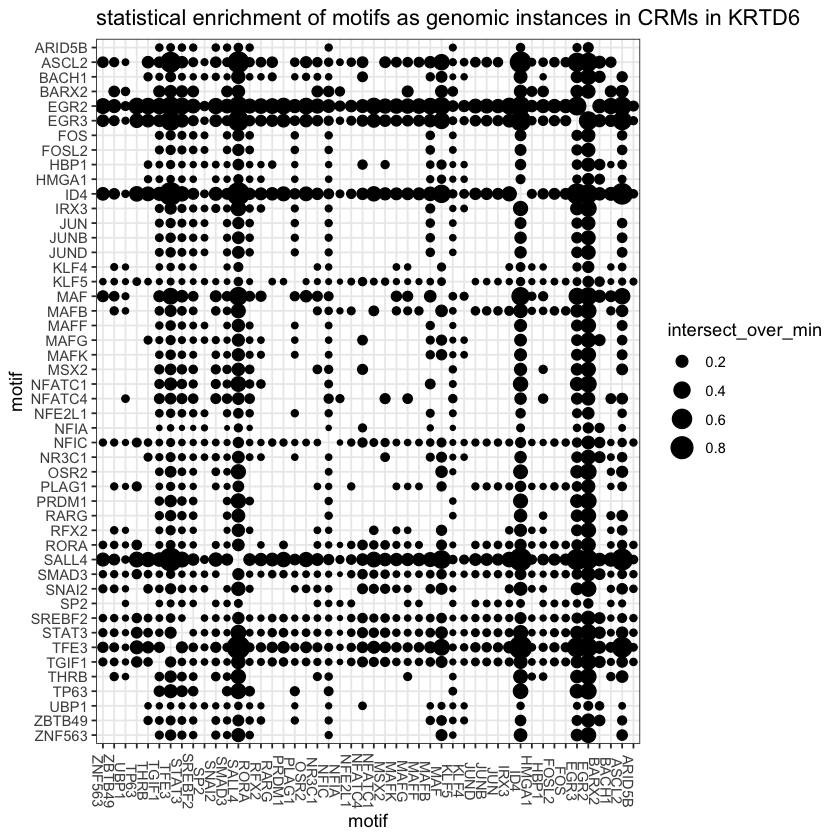

In [57]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in KRTD6')
ggsave(paste0(save_dir,'KRTD6_enrichment_dotplot.pdf'))

[1] 48

Saving 7 x 7 in image



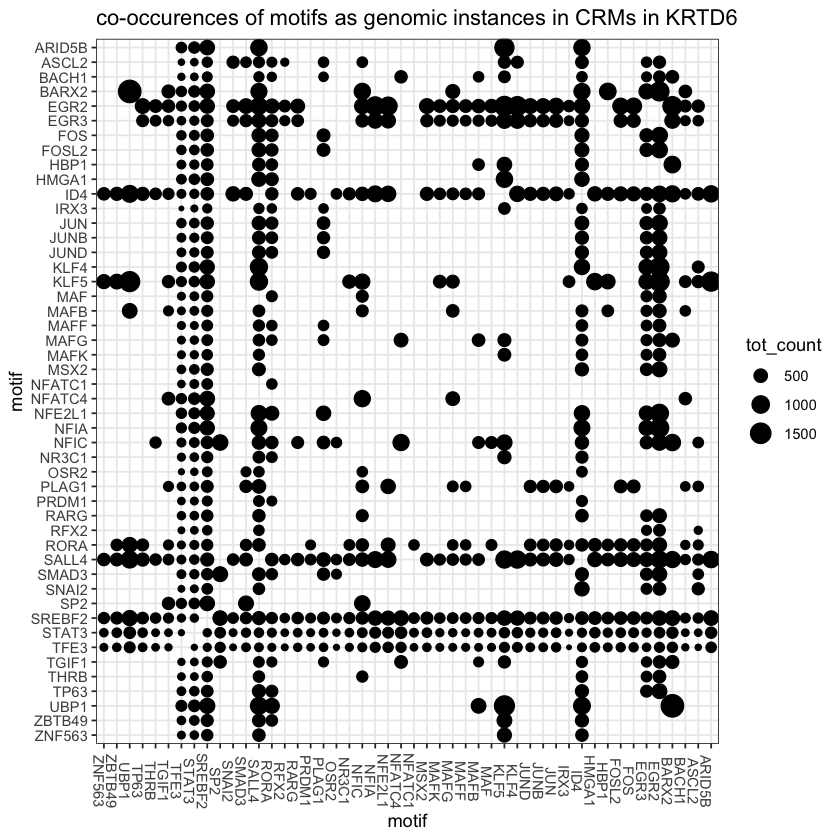

In [7]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in KRTD6')
ggsave(paste0(save_dir,'KRTD6_cooccurence_dotplot.pdf'))

In [42]:
df

,X,tf1,-,tf2,tissue,jaccard,intersect_over_min,intersection,union,num_in_gene,num_in_feat,observed,expected,oddsratio,pval,pval_bonf,log_pval_bonf
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,167,EGR2,,ARID5B,GDSD6,0.035348045,0.13846980,21137,597968,466458,152647,21137,10279.3755,2.284299,0.000000e+00,0.000000e+00,100.00000
2,168,EGR3,,ARID5B,GDSD6,0.023776013,0.10171948,14038,590427,466458,138007,14038,9293.5057,1.586058,0.000000e+00,0.000000e+00,100.00000
3,199,ID4,,ARID5B,GDSD6,0.024727624,0.10606888,14571,589260,466458,137373,14571,9250.8116,1.664186,0.000000e+00,0.000000e+00,100.00000
4,209,KLF5,,ARID5B,GDSD6,0.027307672,0.08608931,17938,656885,466458,208365,17938,14031.4717,1.316885,1.277304e-244,8.847656e-238,100.00000
5,226,NFIC,,ARID5B,GDSD6,0.024003482,0.08917975,14833,617952,466458,166327,14833,11200.5980,1.367832,5.145184e-260,3.563978e-253,100.00000
6,245,RORA,,ARID5B,GDSD6,0.022846253,0.09021787,13847,606095,466458,153484,13847,10335.7397,1.384920,9.788580e-262,6.780376e-255,100.00000
7,247,SALL4,,ARID5B,GDSD6,0.025286381,0.10821253,14900,589250,466458,137692,14900,9272.2934,1.703140,0.000000e+00,0.000000e+00,100.00000
8,248,SMAD3,,ARID5B,GDSD6,0.022918351,0.08939973,13946,608508,466458,155996,13946,10504.8999,1.370903,2.666780e-248,1.847232e-241,100.00000
9,251,SNAI2,,ARID5B,GDSD6,0.022230646,0.09138652,13312,598813,466458,145667,13312,9809.3365,1.404625,8.028882e-273,5.561465e-266,100.00000


[1] 58

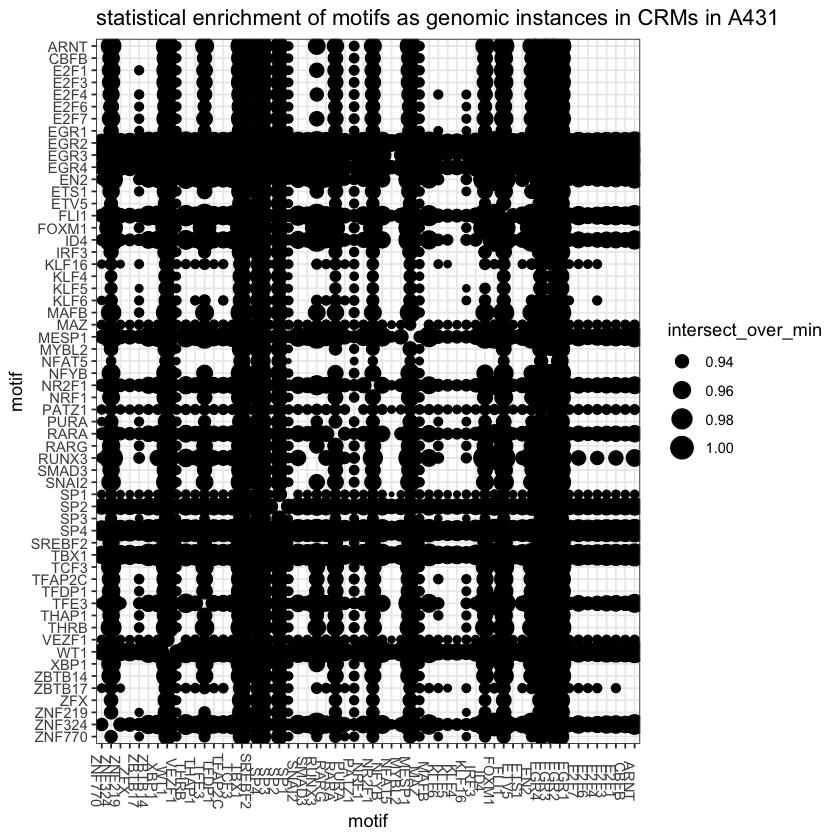

In [56]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs_scc/expr_cancer_pair_filt_unique.csv',
             mpra_tfs)
df = df%>%filter(log_pval_bonf>75)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in A431')
ggsave(paste0(save_dir,'A431-CTRL_enrichment_dotplot.pdf'),
      width=12,height=12)

[1] 58

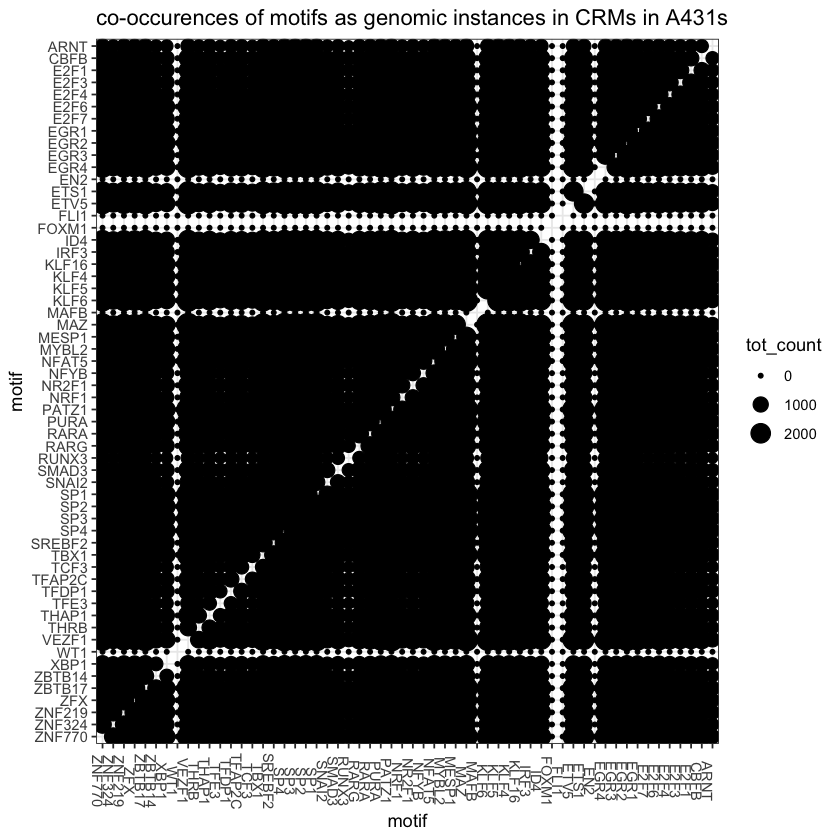

In [58]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs_scc/expr_A431-CTRLi_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in A431s')
ggsave(paste0(save_dir,'A431-CTRLi_cooccurence_dotplot.pdf'),
      width=9,height=9)


## for MC vs MM stuff

In [10]:
# mel_tfs = unique(c(mc_tfs,mm_tfs,skin_tfs))
# length(mel_tfs)

[1] 29

Saving 7 x 7 in image



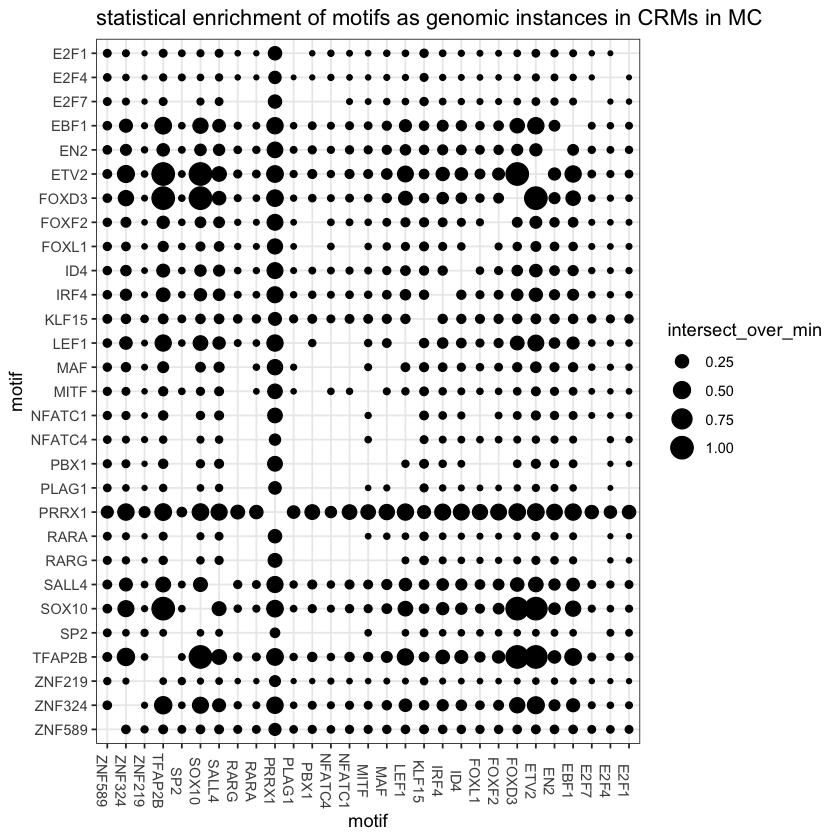

In [59]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_Melanocytes_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in MC')
ggsave(paste0(save_dir,'MC_enrichment_dotplot.pdf'))

[1] 29

Saving 7 x 7 in image



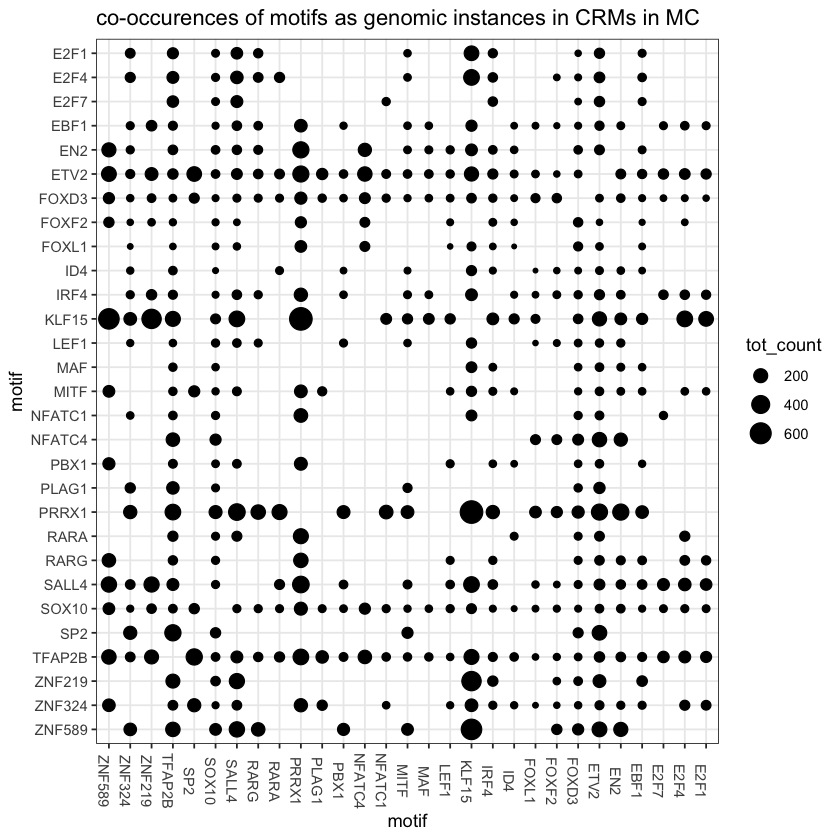

In [11]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_Melanocytes_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in MC')
ggsave(paste0(save_dir,'MC_cooccurence_dotplot.pdf'))

[1] 33

Saving 7 x 7 in image



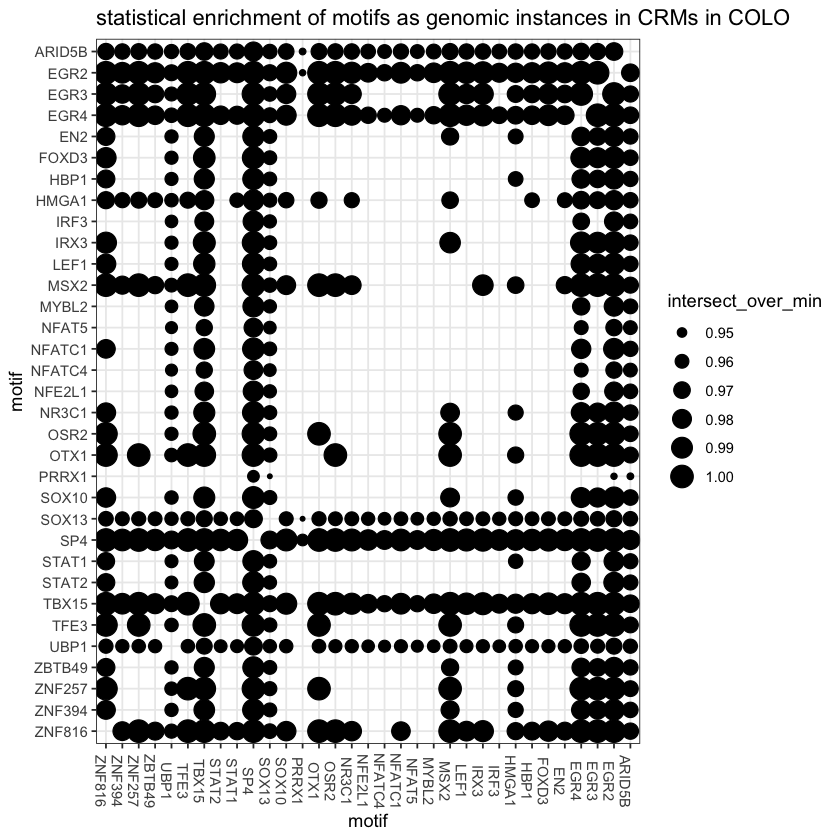

In [65]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs_mm/expr_cancer_pair_filt_unique.csv',
             mpra_tfs)
df = df%>%filter(log_pval_bonf>75)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in COLO')
ggsave(paste0(save_dir,'COLO_enrichment_dotplot.pdf'))

[1] 58

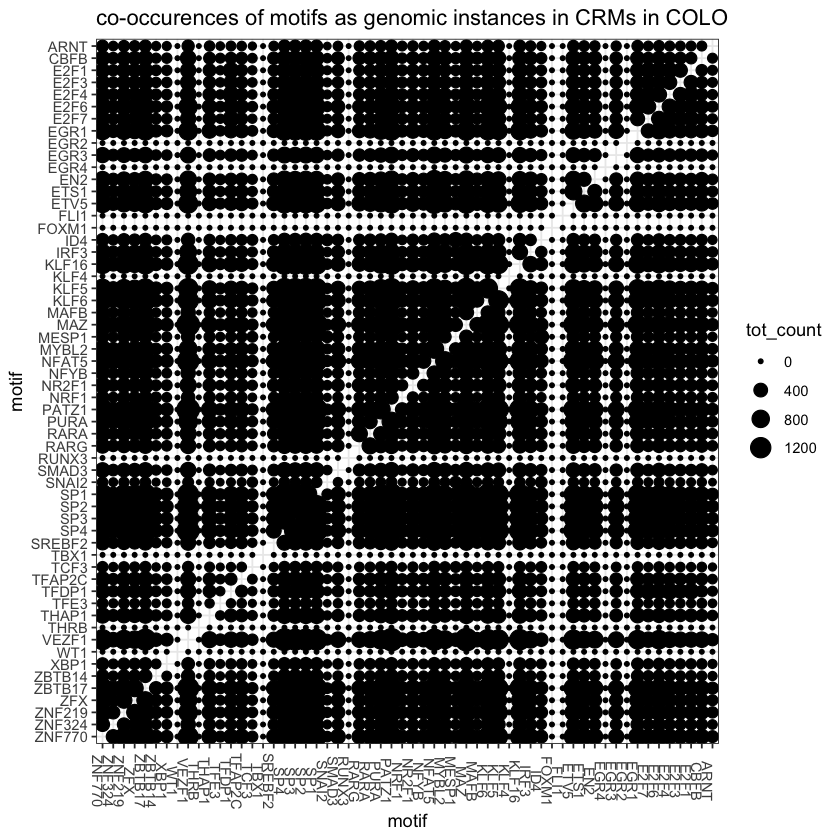

In [66]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs_mm/expr_COLO-SCR-DMSO_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in COLO')
ggsave(paste0(save_dir,'COLO_cooccurence_dotplot.pdf'),
      width=9,height=9)

# others colon/gms

[1] 42

Saving 7 x 7 in image



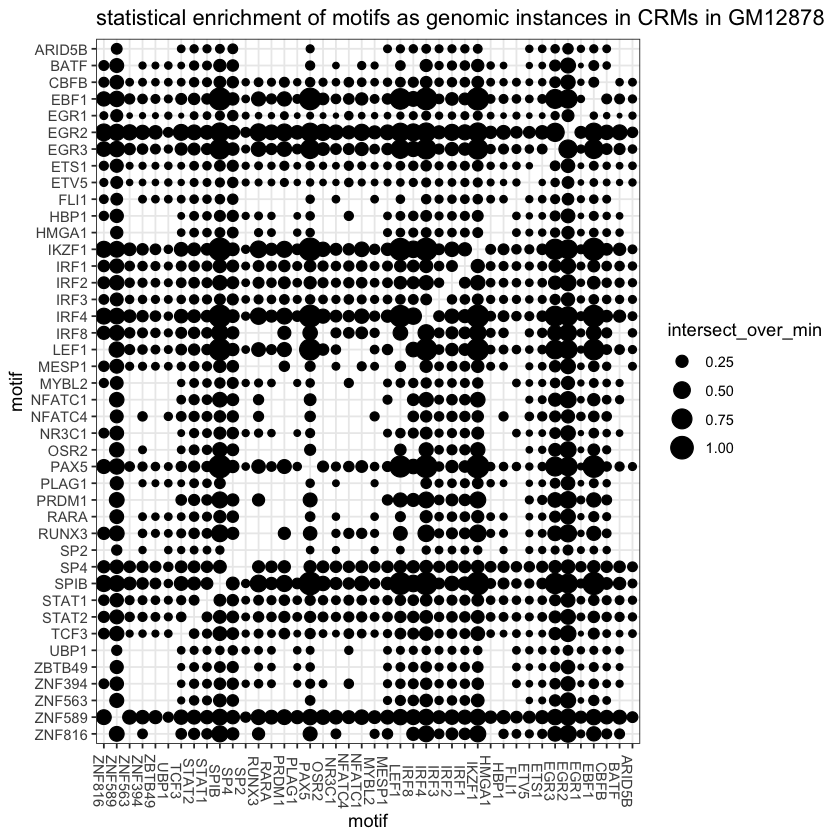

In [63]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in GM12878')
ggsave(paste0(save_dir,'GM12878_enrichment_dotplot.pdf'))

[1] 42

Saving 7 x 7 in image



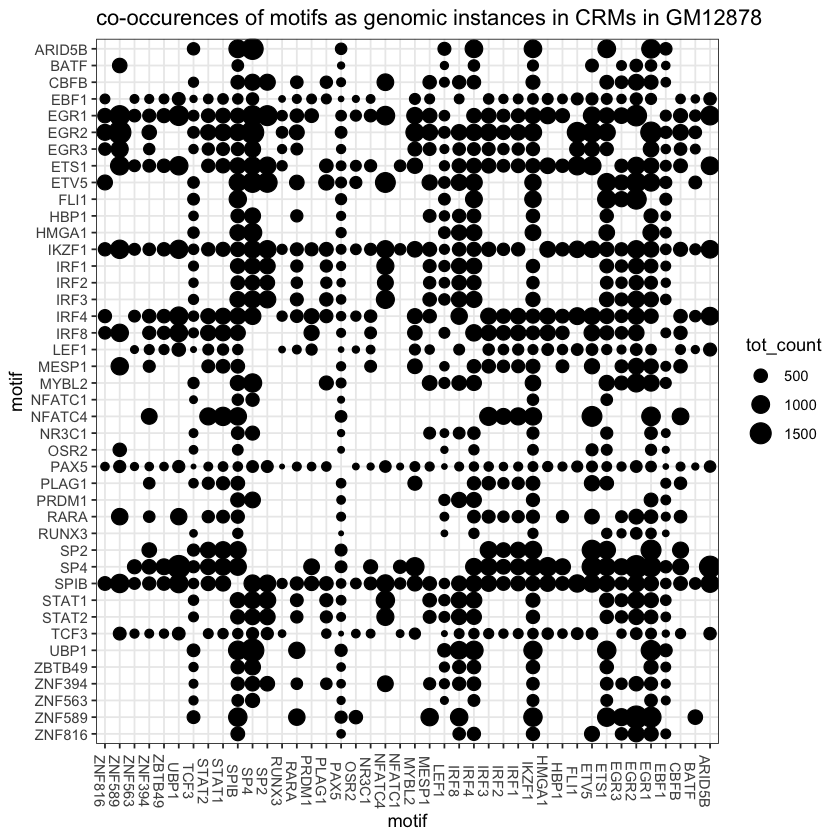

In [80]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in GM12878')
ggsave(paste0(save_dir,'GM12878_cooccurence_dotplot.pdf'))

[1] 33

Saving 7 x 7 in image



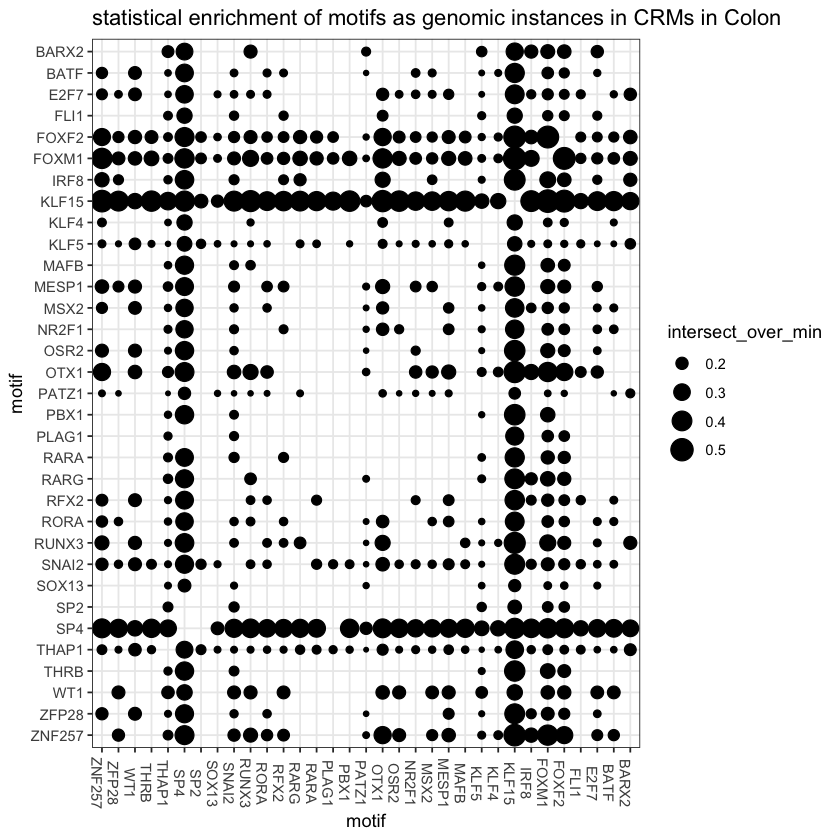

In [64]:
df = get_countinfo_df('../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_pair_filt_unique.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=intersect_over_min))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('statistical enrichment of motifs as genomic instances in CRMs in Colon')
ggsave(paste0(save_dir,'Colon_enrichment_dotplot.pdf'))

[1] 33

Saving 7 x 7 in image



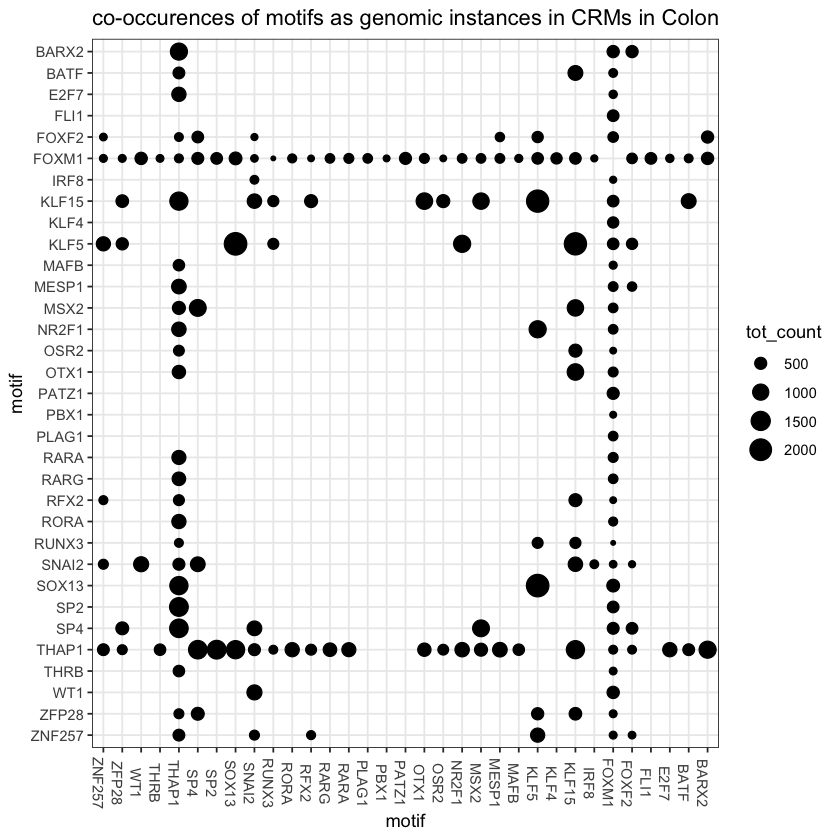

In [81]:
df = get_count_df( '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_type.csv',
             mpra_tfs)
tfs_used = sort(unique(df$tf1),decreasing=TRUE)
length(tfs_used)
ggplot(df,aes(x=factor(tf1,levels=tfs_used),
              y=factor(tf2,levels=tfs_used),size=tot_count))+
    geom_point()+theme_bw()+ 
    theme(axis.text.x = element_text(angle = -90))+
    xlab('motif')+ylab('motif')+
    ggtitle('co-occurences of motifs as genomic instances in CRMs in Colon')
ggsave(paste0(save_dir,'Colon_cooccurence_dotplot.pdf'))